In [1]:
import pickle
import pandas as pd
# Importing my own choice
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model

In [2]:
import numpy as np
prep_data_dir="/content/drive/MyDrive/dataset/TrafficDataSet/processed_data/32"
x_train = np.load(prep_data_dir + '/x_train.npy')
y_train = np.load(prep_data_dir + '/y_train.npy')
x_val = np.load(prep_data_dir + '/x_val.npy')
y_val = np.load(prep_data_dir + '/y_val.npy')


print(y_train.shape)
X_train = x_train.astype('float')/255
X_train = x_train.reshape((X_train.shape[0], 32*32*3))
X_val = x_val.astype('float')/255
X_val = x_val.reshape((x_val.shape[0], 32*32*3))
print(X_train.shape)

(5592, 13)
(5592, 3072)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
y_pred = model.predict(X_val)


In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       120
           1       0.95      0.86      0.90       114
           2       0.64      0.38      0.48        92
           3       0.49      0.45      0.47       103
           4       0.69      0.44      0.54       119
           5       0.86      0.62      0.72       107
           6       0.78      0.51      0.62        84
           7       0.69      0.62      0.65       112
           8       0.80      0.50      0.61       123
           9       0.73      0.54      0.62       112
          10       0.80      0.73      0.77        98
          11       0.93      0.88      0.91       103
          12       0.78      0.87      0.82       112

   micro avg       0.78      0.64      0.70      1399
   macro avg       0.78      0.63      0.69      1399
weighted avg       0.78      0.64      0.69      1399
 samples avg       0.64      0.64      0.64      1399



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred, y_val))

0.6354538956397426


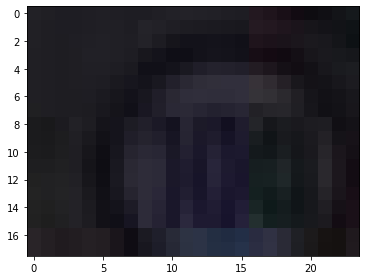

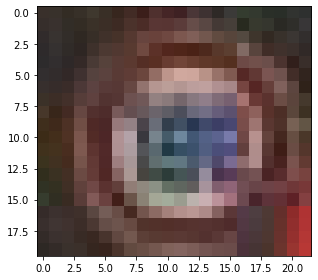

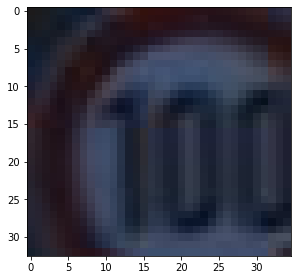

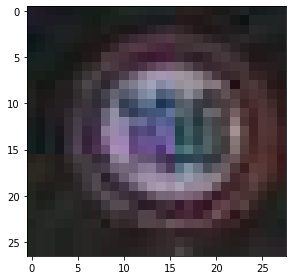

In [7]:
import os
from pylab import *
from skimage import io
test_path = "/content/drive/MyDrive/dataset/TrafficDataSet/test/"
test_files = os.listdir(test_path)
for i in range(4):
    img = io.imread(test_path+test_files[i])
    figure(i)
    io.imshow(img)

In [13]:
y_test=pd.read_csv("/content/drive/MyDrive/dataset/TrafficDataSet/test.csv")

y_test=y_test['class'].values

x_test = np.load(prep_data_dir + '/x_test.npy')
X_test = x_test.astype('float')/255
X_test = x_test.reshape((x_test.shape[0], 32*32*3))
print(y_test)
print(X_test.shape)

[ 0  0  0 ... 12 12 12]
(1399, 3072)


In [16]:

pred = model.predict(X_val)

In [23]:
print(metrics.accuracy_score(pred, y_val)) 

0.6354538956397426


In [19]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       120
           1       0.95      0.86      0.90       114
           2       0.64      0.38      0.48        92
           3       0.49      0.45      0.47       103
           4       0.69      0.44      0.54       119
           5       0.86      0.62      0.72       107
           6       0.78      0.51      0.62        84
           7       0.69      0.62      0.65       112
           8       0.80      0.50      0.61       123
           9       0.73      0.54      0.62       112
          10       0.80      0.73      0.77        98
          11       0.93      0.88      0.91       103
          12       0.78      0.87      0.82       112

   micro avg       0.78      0.64      0.70      1399
   macro avg       0.78      0.63      0.69      1399
weighted avg       0.78      0.64      0.69      1399
 samples avg       0.64      0.64      0.64      1399



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


original:  0  predicted:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
original:  0  predicted:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
original:  0  predicted:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
original:  0  predicted:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
original:  0  predicted:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


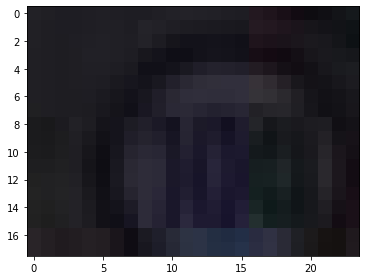

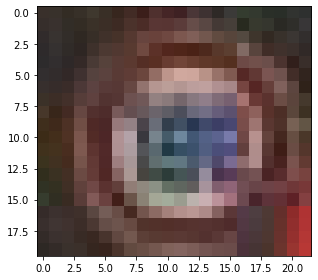

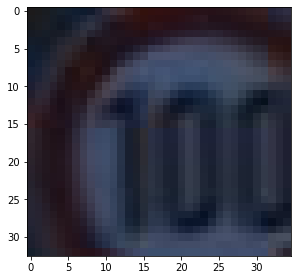

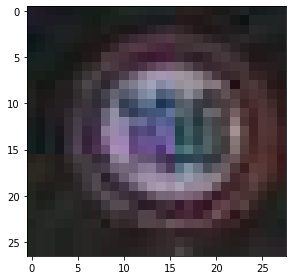

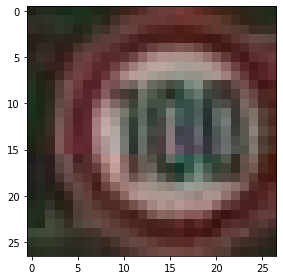

In [21]:
import random

test_path = "/content/drive/MyDrive/dataset/TrafficDataSet/test/"
test_files = os.listdir(test_path)

for i in range(5):
    
    img = io.imread(test_path+test_files[i])
    figure(i)
    io.imshow(img)
    
    print('original: ', y_test[i], ' predicted: ', pred[i])